## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# downloading csv dataset
data = pd.read_csv('Brain Tumor.csv')
print(data.head())
data.info()

# dataset found on kaggle
# the data matches symptoms to mental disorder
# my goal is to build a model that can predict the disorder diagnosed reliably based on self-reported symptoms 
# there are no null entries 

    Image  Class      Mean  ...  Dissimilarity  Correlation     Coarseness
0  Image1      0  6.535339  ...       4.473346     0.981939  7.458341e-155
1  Image2      0  8.749969  ...       3.220072     0.988834  7.458341e-155
2  Image3      1  7.341095  ...       5.981800     0.978014  7.458341e-155
3  Image4      1  5.958145  ...       7.700919     0.964189  7.458341e-155
4  Image5      0  7.315231  ...       6.834689     0.972789  7.458341e-155

[5 rows x 15 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            376

In [3]:
# data wrangling 
# data.replace('no',0, inplace=True)
# data.replace('yes',1, inplace=True)


In [5]:
#  data wrangling 
dfUnclean = pd.DataFrame(data)
# print(df.head())
# 1 = yes
# 0 = no

# drop unnecessary columns
df = dfUnclean.drop(axis=1, columns=['Image'])
print(df.head())

from sklearn.model_selection import train_test_split

# separate target variable from features
X = df.iloc[:, 1:] # the attributes = the last 14 columns 
y = df.Class # the target varibale = 1st column, Class
y.reset_index(drop=True, inplace=True)
# 1 = tumor, 0 = no tumor 

print(df.shape)
print(X.shape)
print(y.shape)
print(y.head())

# partition data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=13)



   Class      Mean     Variance  ...  Dissimilarity  Correlation     Coarseness
0      0  6.535339   619.587845  ...       4.473346     0.981939  7.458341e-155
1      0  8.749969   805.957634  ...       3.220072     0.988834  7.458341e-155
2      1  7.341095  1143.808219  ...       5.981800     0.978014  7.458341e-155
3      1  5.958145   959.711985  ...       7.700919     0.964189  7.458341e-155
4      0  7.315231   729.540579  ...       6.834689     0.972789  7.458341e-155

[5 rows x 14 columns]
(3762, 14)
(3762, 13)
(3762,)
0    0
1    0
2    1
3    1
4    0
Name: Class, dtype: int64


In [6]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='prior')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)


print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.5438441098317095


[[603  11]
 [ 14 501]]
Accuracy = 0.9778565101860053


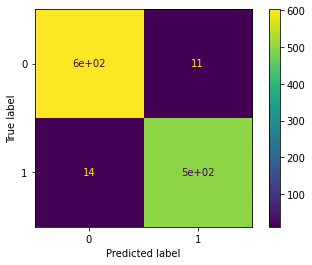

In [7]:
# making a decision tree model 

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

from sklearn import metrics

cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)

acc_dt =  metrics.accuracy_score(y_test, y_pred)

print('Accuracy =',acc_dt)


import matplotlib.pyplot as plt

metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()


In [8]:
# Feature Importance from Decision Tree

print('Feature Importance:', dt.feature_importances_)
imp=pd.DataFrame(zip(X_train.columns, dt.feature_importances_))
importanceSorted = imp.sort_values(1, ascending=False)
print(importanceSorted)

# now i know that the most important features from the Decision Tree Classifier are Entropy, Kurtosis,and Homogeneity
# lets compare how feature importance varies with different models 

Feature Importance: [0.00000000e+00 8.58329166e-03 2.37454201e-02 8.42875986e-01
 1.18690613e-02 4.24826658e-02 3.97717663e-03 1.37802382e-02
 3.50833296e-03 3.48279376e-02 7.66641176e-04 1.35832489e-02
 0.00000000e+00]
                     0         1
3              Entropy  0.842876
5             Kurtosis  0.042483
9          Homogeneity  0.034828
2   Standard Deviation  0.023745
7               Energy  0.013780
11         Correlation  0.013583
4             Skewness  0.011869
1             Variance  0.008583
6             Contrast  0.003977
8                  ASM  0.003508
10       Dissimilarity  0.000767
0                 Mean  0.000000
12          Coarseness  0.000000


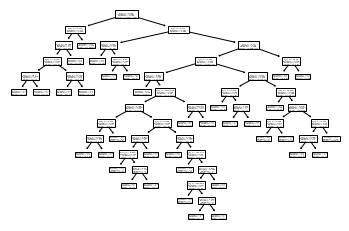

In [9]:
from sklearn import tree

plt.figure(2)
tumorTree = tree.plot_tree(dt)
plt.show()

<Figure size 4608x3456 with 0 Axes>

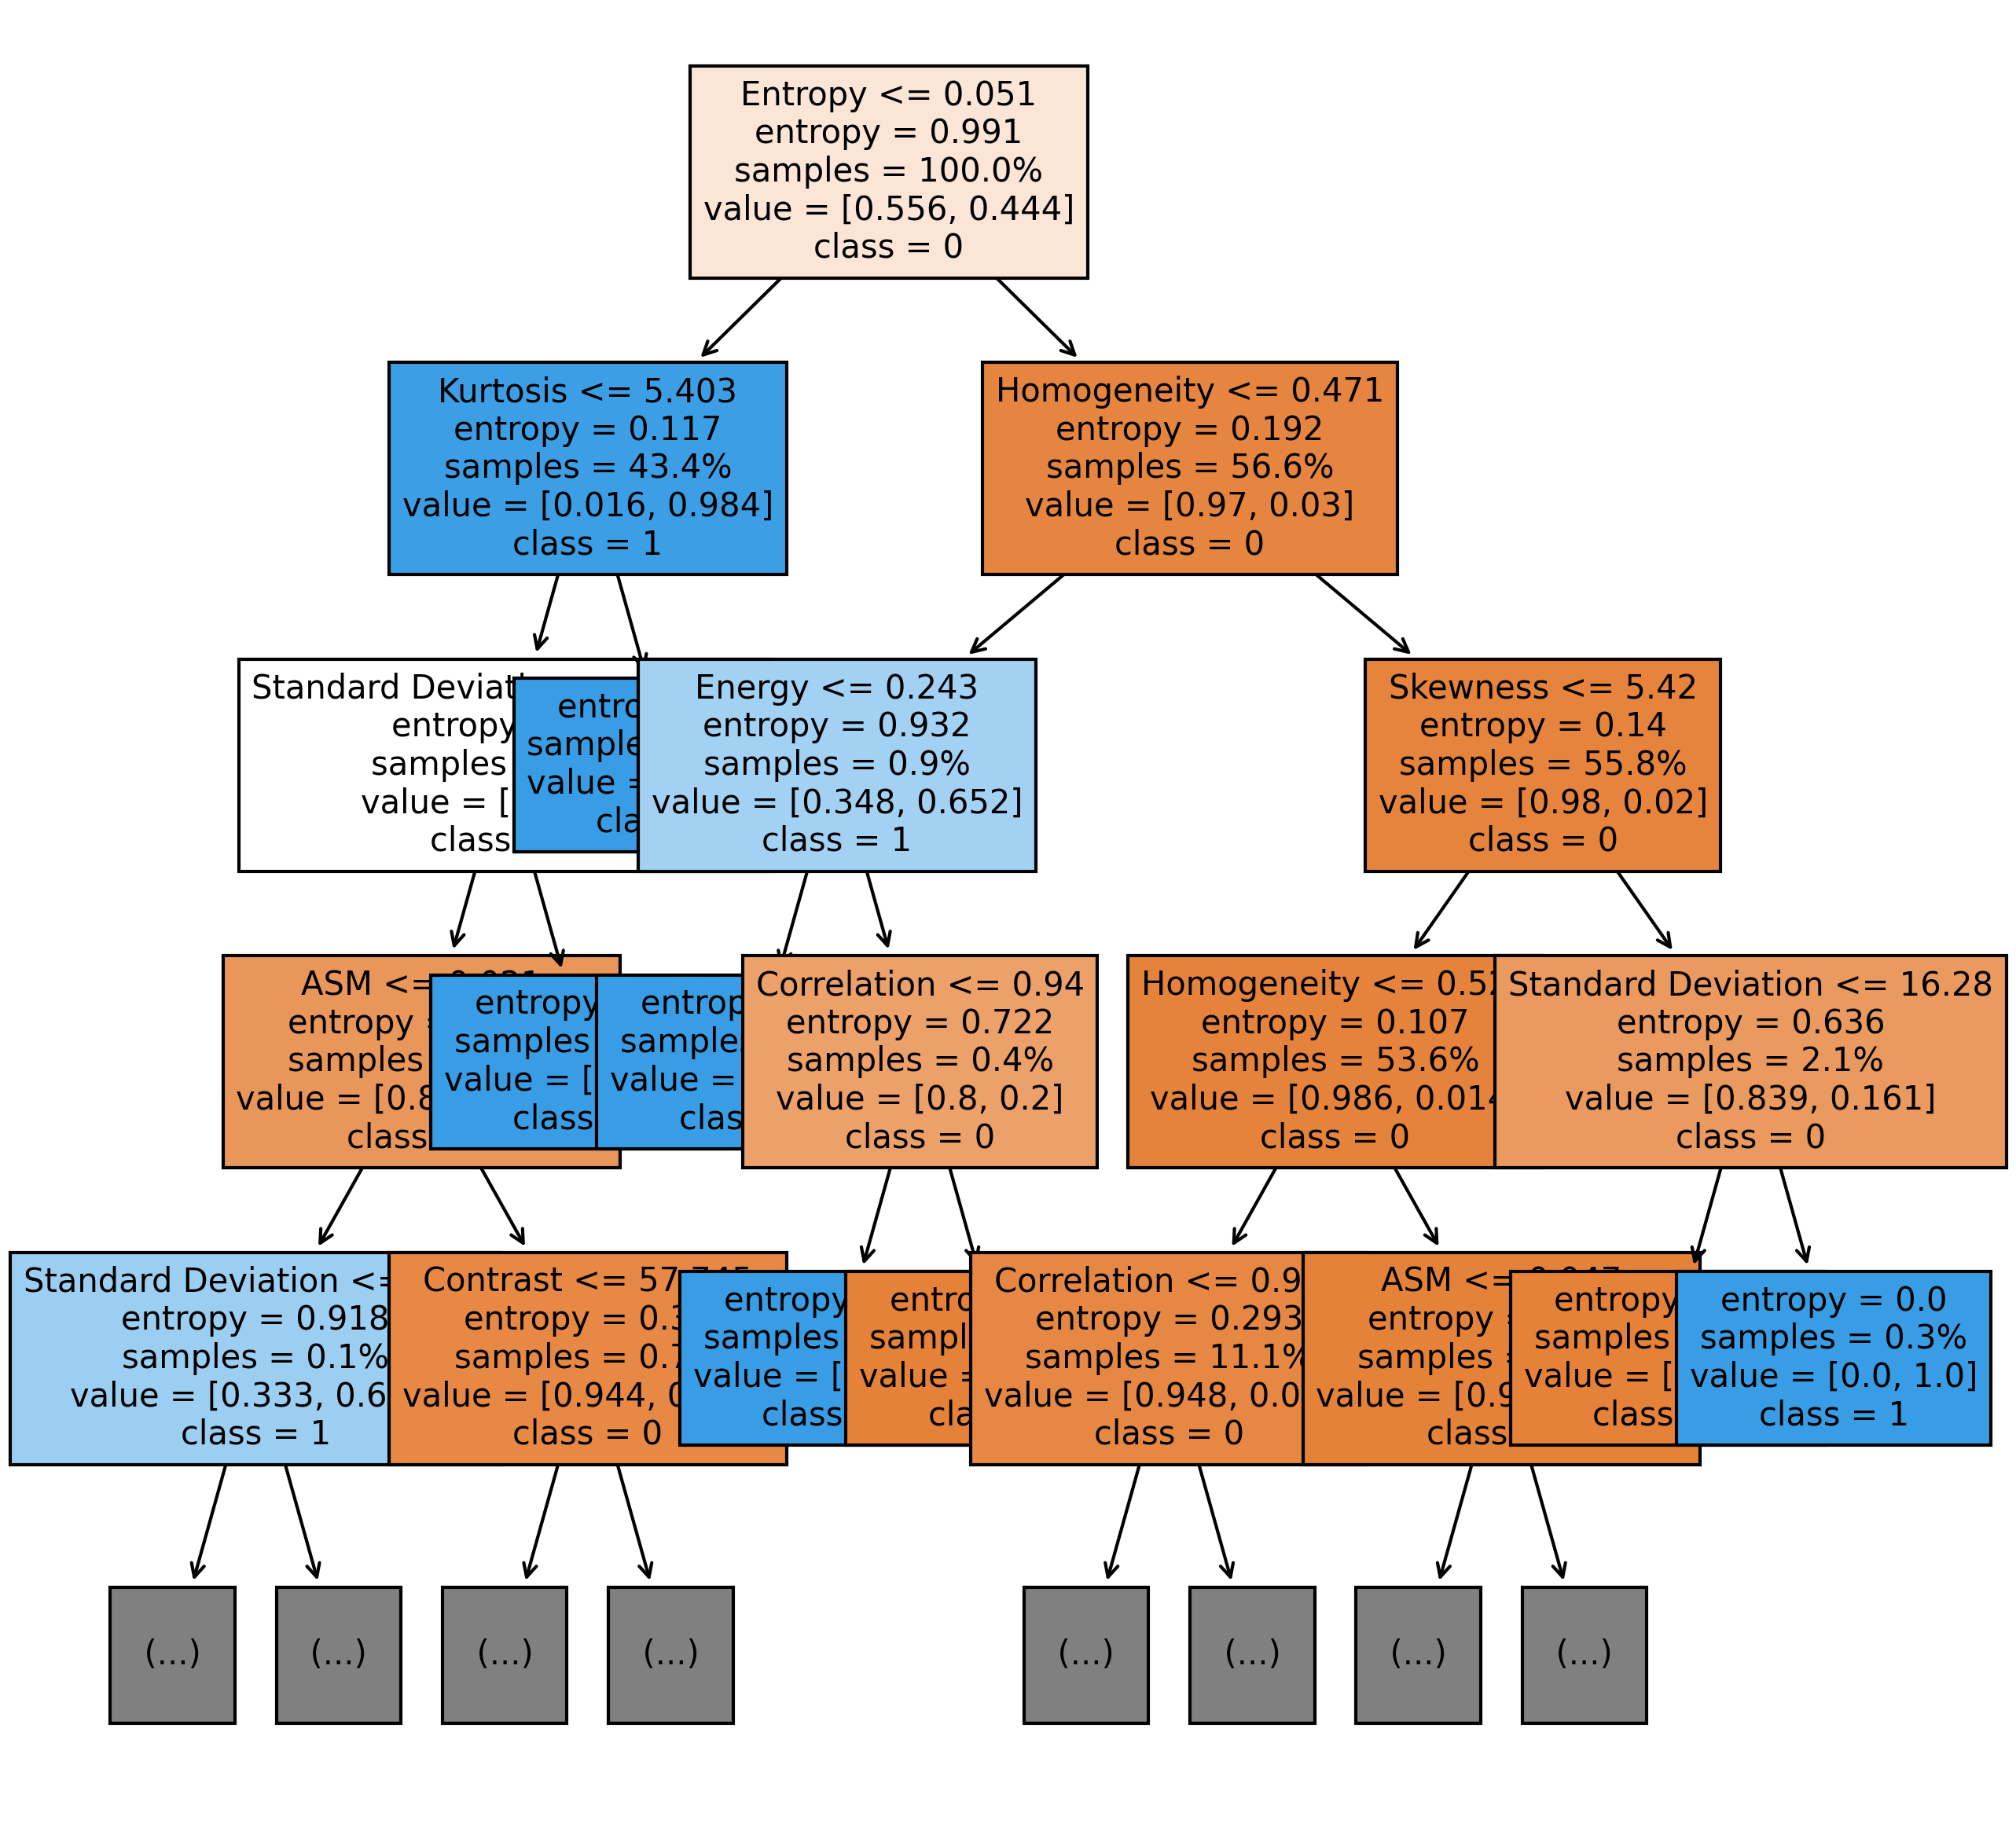

In [19]:
from sklearn import tree

plt.figure(2, figsize=[64,48])
plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
fn = X.columns
cn = ['0','1']
tumorTree = tree.plot_tree(dt,proportion = True, fontsize=10,max_depth=4 ,feature_names=fn, class_names=cn, filled=True)

plt.savefig('tumorDT.png')
plt.show()

In [20]:
# Generic Bagging model
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_bagging = BaggingClassifier(random_state = 13)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print(' Accuracy = ', acc_bagging)

 Accuracy =  0.9840566873339238


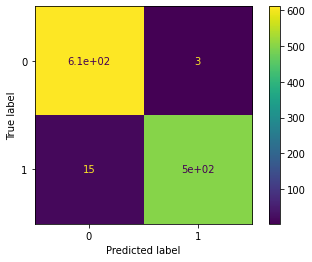

In [33]:
metrics.plot_confusion_matrix(model_bagging, X_test, y_test)
plt.show()

In [26]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=13)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, predict_rf)
acc_rf = round(accuracy_score(y_test, model_rf.predict(X_test)),4)
print('Testing Accuracy:\t\t', acc_rf)

Testing Accuracy:		 0.9867


In [23]:
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)

In [12]:
# Top 3 features for RandomForest
feature_importances = model_rf.feature_importances_
features = X_train.columns
df_features = pd.DataFrame({'features': features, 'importance': feature_importances})
df_features_sorted = df_features.sort_values(by='importance', ascending=False)
print(df_features_sorted)


              features  importance
7               Energy    0.282772
3              Entropy    0.266115
8                  ASM    0.232861
9          Homogeneity    0.090736
10       Dissimilarity    0.036506
5             Kurtosis    0.033592
4             Skewness    0.017331
2   Standard Deviation    0.012794
1             Variance    0.008115
6             Contrast    0.007074
0                 Mean    0.006615
11         Correlation    0.005490
12          Coarseness    0.000000


In [13]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_est = DecisionTreeClassifier (max_depth = 4)
ada_boost = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)
ada_boost.fit(X_train, y_train)
acc_boost = round(accuracy_score(y_test, ada_boost.predict(X_test)),4)
print('AdaBoost Acc:\t', acc_boost)

AdaBoost Acc:	 0.9814


In [14]:
# Top 3 features for AdaBoost
feature_importances = ada_boost.feature_importances_
features = X_train.columns
df_adaBoost = pd.DataFrame({'features': features, 'importance': feature_importances})
df_adaBoost_sorted = df_adaBoost.sort_values(by='importance', ascending=False)
print(df_adaBoost_sorted)

              features  importance
11         Correlation    0.782091
3              Entropy    0.070868
10       Dissimilarity    0.029385
6             Contrast    0.027716
9          Homogeneity    0.018190
5             Kurtosis    0.017492
1             Variance    0.011631
2   Standard Deviation    0.010946
4             Skewness    0.010305
8                  ASM    0.009006
0                 Mean    0.007361
7               Energy    0.005009
12          Coarseness    0.000000


In [32]:
# XG Boost 
import xgboost as xgb
from sklearn.metrics import mean_squared_error


xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.118709


In [65]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

data_dmatrix = xgb.DMatrix(data=X,label=y)


cv_results_xgb = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results_xgb.head()


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.472445,0.000433,0.474146,0.001105
1,0.438840,0.009253,0.441484,0.011489
2,0.414856,0.015651,0.418116,0.018054
3,0.393987,0.017280,0.398649,0.021415
4,0.375672,0.026753,0.380758,0.030893


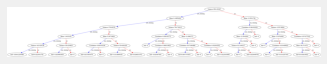

In [81]:
# visualize xgb model 
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=50)
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=4)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

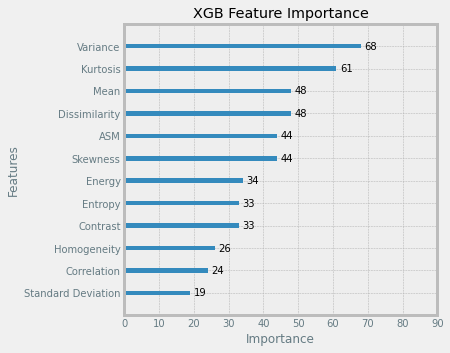

In [87]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.xticks(np.arange(0,100,step=10))
plt.xlabel('Importance')
plt.title('XGB Feature Importance')
plt.rcParams['font.size'] = 10
plt.savefig('XGB_Feature_Importance.png')
plt.show()

In [16]:
# After analyzing my data and creating different models using: 
# DummyClassifier, DecisionTreeClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
# I have found that my most accurate models come down to the RandomForestClassifier and the XGBoost
# they both achieved around 99% accuracy in identifying whether there was a brain tumor or not
# the most important features according to the random forest classifier include: Energy, Entropy, ASM, and Homogenity
# the xgb model however listed feature importances that matched the dataset first order attributes much more closely
# compared to the Baseline accuracy of 54%, the XGB Model is clearly the best model with roughly 99% accuracy


In [54]:
	# cross validating results
acc_all = [baseline_acc, acc_dt, acc_bagging, acc_rf, acc_boost]
labels = ["Baseline", "Decision Tree", "Bagging","Random Forest", "AdaBoost"] 

scoring = "accuracy"

models = [DummyClassifier(), DecisionTreeClassifier(), BaggingClassifier(), RandomForestClassifier(), AdaBoostClassifier()]


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


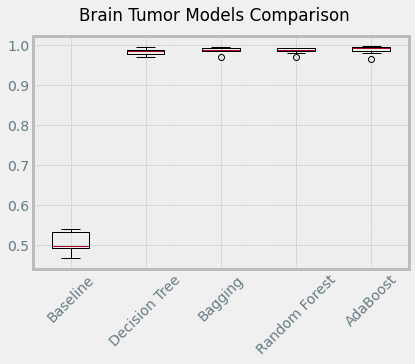

In [58]:
from sklearn import model_selection
results = []
for i in range(len(models)):
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(models[i], X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
 
# boxplot comparison
fig = plt.figure()
fig.suptitle("Brain Tumor Models Comparison")
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy Score")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(labels, rotation=45)
plt.show()

# shows that all the models had high accuracy, especially compared to baseline 